In [64]:
from get_sentiment import *
plt.style.use('ggplot')

In [2]:
with open('data/tweets.json', 'r') as f:
    data = json.load(f)

In [3]:
clean_tweets, tag_set = cluster_flocks(data)

In [4]:
tag_set.most_common(5)

[('#BernieWon', 522),
 ('#RiggedPrimary', 519),
 ('#MayorCheat', 512),
 ('#ShadowInc', 434),
 ('#IowaCaucusDisaster', 414)]

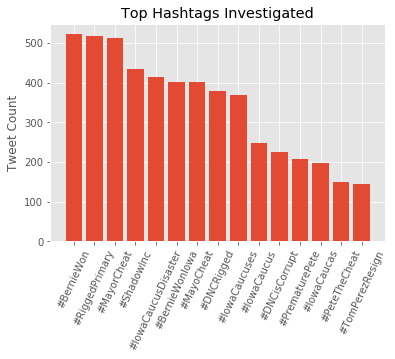

In [65]:
plt.bar([tag[0] for tag in tag_set.most_common(15)], [tag[1] for tag in tag_set.most_common(15)])
plt.xticks(rotation=65)
plt.ylabel('Tweet Count')
plt.title('Top Hashtags Investigated')
plt.show;

In [31]:
word_count = Counter(" ".join([re.sub(r'\s',' ',tweet[0]).strip() for tweet in clean_tweets]).split())

In [32]:
word_count.most_common(10)

[('the', 1838),
 ('to', 1039),
 ('is', 736),
 ('a', 660),
 ('and', 615),
 ('of', 588),
 ('in', 460),
 ('for', 375),
 ('you', 338),
 ('that', 324)]

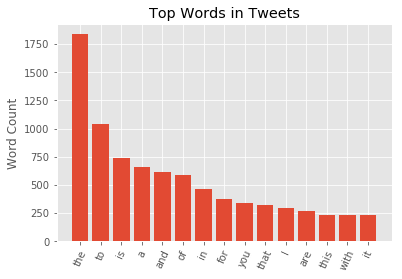

In [69]:
plt.bar([word[0] for word in word_count.most_common(15)], [word[1] for word in word_count.most_common(15)])
plt.xticks(rotation=65)
plt.ylabel('Word Count')
plt.title('Top Words in Tweets')
plt.show();

In [55]:
stopwords_list=stopwords.words('english') +list(string.punctuation)
stopwords_list += ["&amp;","'",'"','...','``','…','’','‘','“',"''",'""','”','”','co',"'s'",'\'s','n\'t','\'m','\'re','amp','https']
    

In [56]:
[word[0] for word in word_count.most_common() if word[0].lower() not in stopwords_list]

['Iowa',
 'Bernie',
 'DNC',
 'app',
 'results',
 'like',
 'get',
 'people',
 'know',
 'campaign',
 'Pete',
 'would',
 'election',
 'Democratic',
 'Biden',
 'think',
 'want',
 'caucus',
 'vote',
 'going',
 'time',
 'Trump',
 'last',
 'see',
 'Hillary',
 'even',
 'Democrats',
 'one',
 'need',
 'make',
 'party',
 "can't",
 'it.',
 'Shadow',
 'Caucus',
 'victory',
 'still',
 '2016',
 'Buttigieg',
 'company',
 'us',
 'win',
 "I'm",
 'via',
 'rigged',
 'right',
 'supporters',
 'also',
 'trying',
 'Sanders',
 'Democrat',
 'got',
 'Party',
 'really',
 'voting',
 'let',
 'rigging',
 'many',
 'it’s',
 'Dems',
 'look',
 'say',
 'getting',
 'take',
 'called',
 'App',
 'could',
 'It’s',
 'Clinton',
 'never',
 'votes',
 'run',
 'new',
 'name',
 'night',
 'thing',
 'state',
 'good',
 'way',
 'go',
 'Another',
 'trust',
 'corrupt',
 'help',
 'years',
 'don’t',
 'first',
 'better',
 'says',
 'well',
 'come',
 'another',
 'call',
 'keep',
 'I’m',
 'made',
 'rig',
 '’s',
 'media',
 'money',
 'stop',
 '🐀'

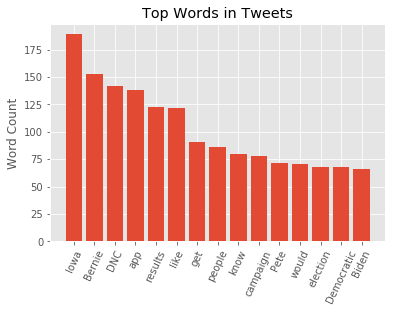

In [67]:
plt.bar([word[0] for word in word_count.most_common(100) if word[0].lower() not in stopwords_list][:15], [word[1] for word in word_count.most_common(100) if word[0].lower() not in stopwords_list][:15])
plt.xticks(rotation=65)
plt.ylabel('Word Count')
plt.title('Top Words in Tweets')
plt.show;

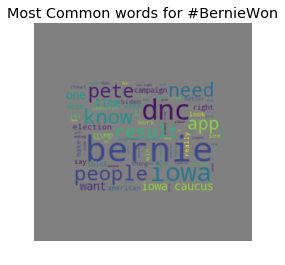

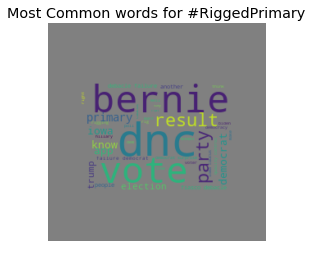

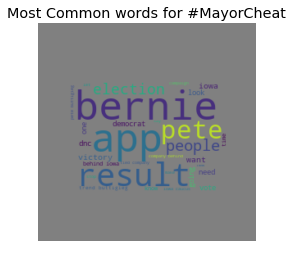

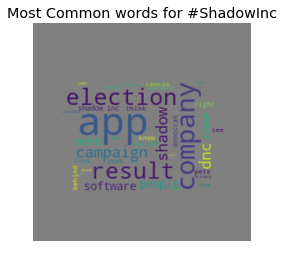

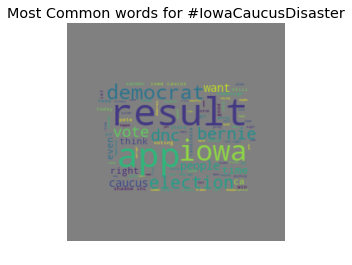

In [68]:
for tag in tag_set.most_common(5):
    subset = list(filter(lambda x: tag[0] in x[1], clean_tweets))
    create_wordcloud([tweet[0] for tweet in subset] , tag[0], 200)